In [3]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_data_path(csv_path):
    new_path = csv_path.replace("/home/somusan/OpencvUni/opencvblog/robotics-series/yolop_idd/", 
                                "data/")
    if os.path.exists(new_path):
        return new_path
    return -1

In [8]:
import numpy as np
import cv2

def draw_segmentation_map(labels, palette):
    """
    :param labels: Label array from the model. Should be of shape 
        <height x width>. No channel information required.
    :param palette: List containing color information.
        e.g. [[0, 255, 0], [255, 255, 0]] 
    """
    # create Numpy arrays containing zeros
    # to be used to fill them with respective red, green, and blue pixels
    red_map = np.zeros_like(labels).astype(np.uint8)
    green_map = np.zeros_like(labels).astype(np.uint8)
    blue_map = np.zeros_like(labels).astype(np.uint8)

    for label_num in range(0, len(palette)):
        index = labels == label_num
        red_map[index] = palette[label_num][0]
        green_map[index] = palette[label_num][1]
        blue_map[index] = palette[label_num][2]
        
    segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
    return segmentation_map

def image_overlay(image, segmented_image):
    """
    :param image: Image in RGB format.
    :param segmented_image: Segmentation map in RGB format. 
    """
    alpha = 0.8  # transparency for the original image
    beta = 1.0   # transparency for the segmentation map
    gamma = 0    # scalar added to each sum
    segmented_image = np.uint8(segmented_image)
    image = np.array(image)
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Overlay the segmentation map on the original image
    overlay = cv2.addWeighted(image, alpha, segmented_image, beta, gamma)
    
    return overlay


# Assuming 'mask' is of size (1, 480, 640) as the output of your model
# Step 1: Remove the channel dimension (1) from the mask
def process_inference_mask(mask):
    if mask.ndim == 3 and mask.shape[0] == 1:
        mask = np.squeeze(mask, axis=0)  # Shape becomes (480, 640)
    return mask


(964, 1280, 3)


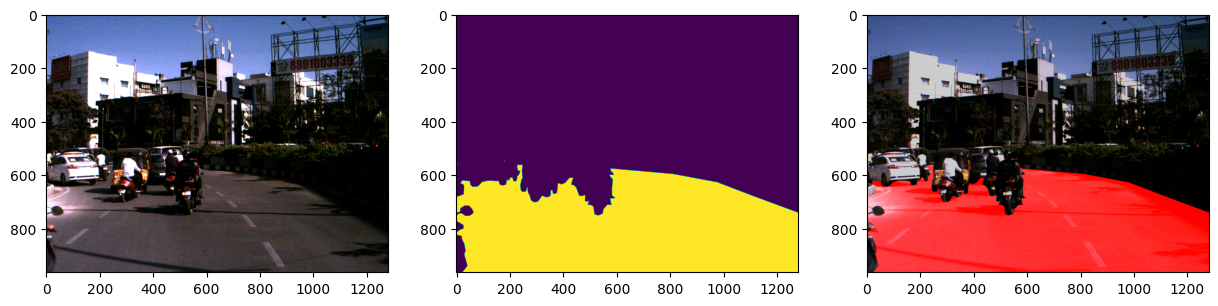

(964, 1280, 3)


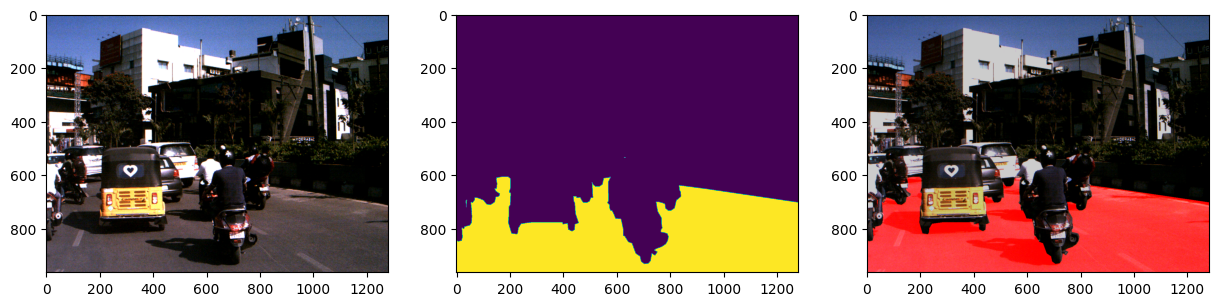

(964, 1280, 3)


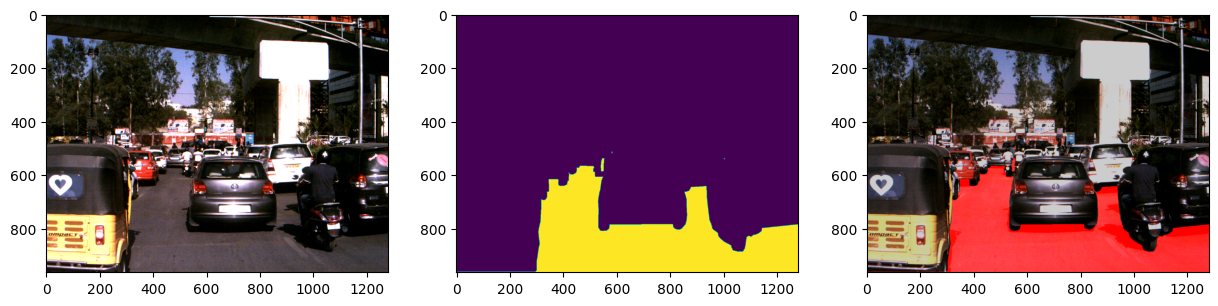

(964, 1280, 3)


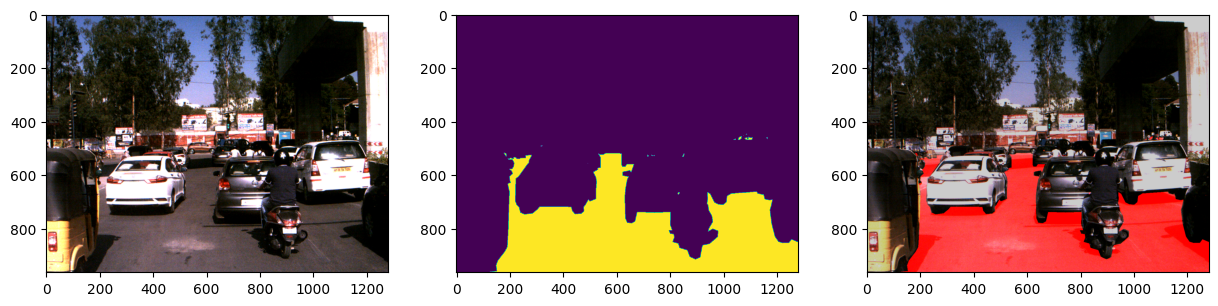

(964, 1280, 3)


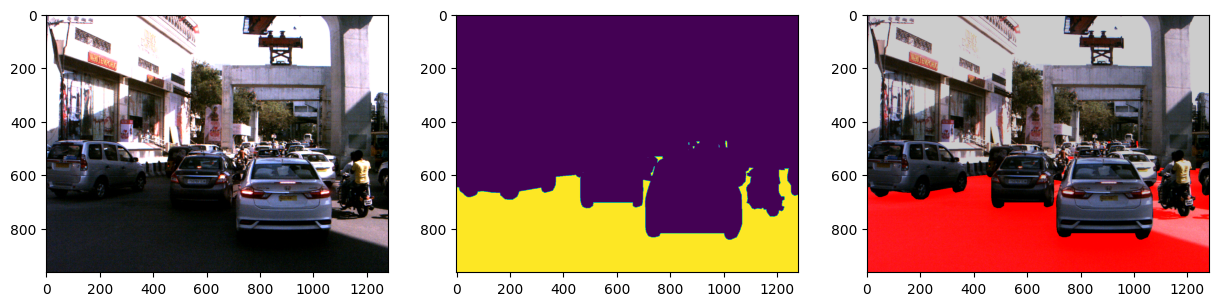

In [9]:
import pandas as pd
import cv2

df = pd.read_csv("train.csv")

# Updated LABEL_COLORS_LIST for 2 classes: background and road
LABEL_COLORS_LIST = [
    [0, 0, 0],      # background (black)
    [255, 0, 0]     # road (red)
]



for i in df.iloc[0:5].iterrows():
    # print(i[1]["mask"].split("/")[-1])
    # print(get_data_path(i[1]["mask"]))
    # print(get_data_path(i[1]["image"]))
    
    mask = cv2.imread(get_data_path(i[1]["mask"]), 0)/255.0
    image = cv2.cvtColor(cv2.imread(get_data_path(i[1]["image"])), cv2.COLOR_BGR2RGB)
    # print(np.unique(mask))
    processed_mask = process_inference_mask(mask)
    # print(processed_mask.shape)
    segmentation_map = draw_segmentation_map(processed_mask, LABEL_COLORS_LIST)

    # Ensure the output image size matches the input frame size
    overlay_image = image_overlay(image, segmentation_map)

    # plt.imshow(segmentation_map)
    # break
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    plt.imshow(image)

    plt.subplot(1,3,2)
    plt.imshow(mask)

    plt.subplot(1,3,3)
    plt.imshow(overlay_image)
    
    plt.show()

In [ ]:


base_dir = "/home/somusan/OpencvUni/opencvblog/robotics-series/yolop_idd/idd-segmentation/IDD_Segmentation/"

# Use glob to find all files in the train folders of both gtFine and leftImg8bit directories
all_files = glob.glob(os.path.join(base_dir, '**', 'train', '**', '*'), recursive=True)

# Filter out directories and only keep files
all_files = [f for f in all_files if os.path.isfile(f) and f.endswith(".png")]

# Further filter files to include those in gtFine and leftImg8bit
gtfine_files = [f for f in all_files if 'gtFine' in f and f.endswith("_road_labels.png")]
leftImg8bit_files = [f for f in all_files if 'leftImg8bit' in f]

train_df_dict = {
    "mask": gtfine_files,
    "image":leftImg8bit_files
}

pd.DataFrame.from_dict(train_df_dict).to_csv("train.csv", index = False)
